In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

from languages import Node, Language
from language_utils.utils import fam

plt.rcParams["figure.figsize"] = (5,5)
plt.ion()

recs = {}
for line in open('./papers/rahimi_ner.txt'):
    language, *scores = line.strip().split()
    scores = [int(score) for score in scores]
    recs[language] = scores

print('Total:', len(recs))
print('Indo-E:', sum(
    Node.find_by_abbrv(lang).belongs_to(fam.indo)
    for lang
    in recs
))
print('GRS:', sum(
    Node.find_by_abbrv(lang).belongs_to(fam.grs)
    for lang
    in recs
))
for l in fam.grs:
    print(f'{l}:', sum(
    Node.find_by_abbrv(lang).belongs_to({l})
    for lang
    in recs
))
print()


def weight(lang):
    return 1
    if Node.find_by_abbrv(lang).belongs_to(fam.grs):
        return 1
    else:
        return 7


for i in range(len(scores)):
    total_avg = np.mean([
        score[i] * weight(lang)
        for lang, score
        in recs.items()
    ])
    indo_avg = np.mean([
        score[i]
        for lang, score
        in recs.items()
        if not Node.find_by_abbrv(lang).belongs_to(fam.grs)
    ])
    plt.scatter(total_avg, indo_avg, c='r', s=2)
    plt.annotate(i,
                 xy=(total_avg, indo_avg),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize='xx-small')

plt.plot([0, 100], [0, 100])
plt.show()

Total: 40
Indo-E: 29
GRS: 22
Italic: 6
Slavic: 10
Germanic: 6



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
ner41 > rahimi_ner
ner101 > heiznerlin_ner
pos > heizel_pos
artefacts > artkekse
xnli > huang
mkqa > longpre

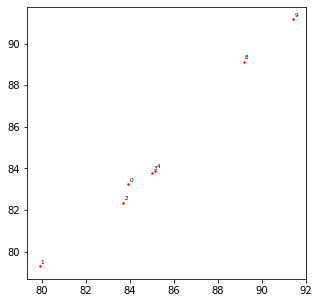

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from language_utils.utils import fam
from languages import Node

data = dict()
for line in open('./papers/heinzerling_ner.txt'):
    lang, *scores = line.strip().split()
    lang = {
        'als': 'gsw',
        'bxr': 'bua',
        'diq': 'zza',
        'gom': 'kok',
        'nrm': 'nrf',
        'sh': 'hbs'
    }.get(lang, lang)
    scores = [float(s) for s in scores]
    data[lang] = scores
    try:
        Node.find_by_abbrv(lang)
    except AttributeError as e:
        print(e)

for i in range(len(scores)):
    total = np.mean([
        score[i]
        for score
        in data.values()
    ])
    non_grs = np.mean([
        score[i]
        for lang, score
        in data.items()
        if not Node.find_by_abbrv(lang).belongs_to(fam.grs)
    ])
    plt.scatter(total, non_grs, c='r', s=2)
    plt.annotate(i,
                 xy=(total, non_grs),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize='xx-small')

plt.show()


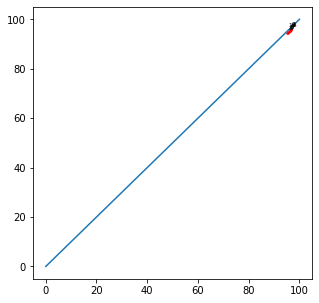

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from language_utils.utils import fam
from languages import Node

data = dict()
for line in open('./papers/heinzerling_pos.txt'):
    lang, *scores = line.strip().split()
    scores = [float(s) for s in scores]
    data[lang] = scores
    # try:
    #     Node.find_by_abbrv(lang)
    # except AttributeError as e:
    #     print(e)

for i in range(len(scores)):
    total = np.mean([
        score[i]
        for score
        in data.values()
    ])
    non_grs = np.mean([
        score[i]
        for lang, score
        in data.items()
        if not Node.find_by_abbrv(lang).belongs_to(fam.grs)
    ])
    plt.scatter(total, non_grs, c='r', s=2)
    plt.annotate(i,
                 xy=(total, non_grs),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize='xx-small')

plt.plot([0, 100], [0, 100])
plt.show()


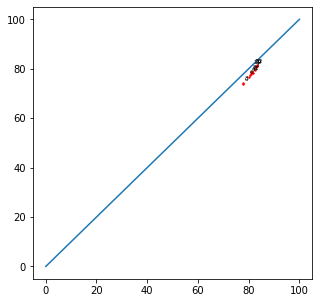

In [13]:
import numpy as np
import matplotlib.pyplot as plt

langs = 'en fr es de el bg ru tr ar vi th zh hi sw ur'.split()
mask = [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

data = [
    list(map(float, line.split()))
    for line
    in open('./papers/artetxe_nli.txt')
]

for i, m in enumerate(data):
    total = np.mean(m)
    non_grs = np.mean([a for a, b in zip(m, mask) if b])
    plt.scatter(total, non_grs, s=2, c='r')
    plt.annotate(i,
                 xy=(total, non_grs),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize='xx-small')
plt.plot([0, 100], [0, 100])
plt.show()

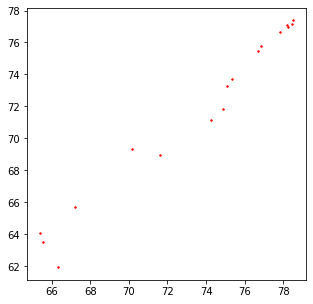

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from language_utils.utils import fam
from languages import Node

langs = 'en fr es de el bg ru tr ar vi th zh hi sw ur'.split()

for line in open('./papers/huang_nli.txt'):
    scores = line.strip().split()
    scores = [float(s) for s in scores]

    total = np.mean(scores)
    non_grs = np.mean([
        s
        for i, s
        in enumerate(scores)
        if not Node.find_by_abbrv(langs[i]).belongs_to(fam.indo)
    ])
    plt.scatter(total, non_grs, c='r', s=2)

plt.show()


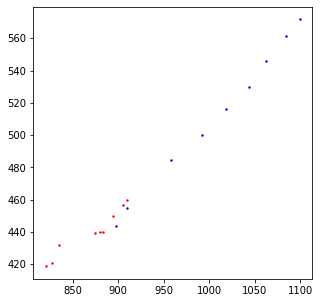

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from language_utils.utils import fam
from languages import Node

data = dict()
for line in open('./papers/longpre_qa.txt'):
    lang, *scores = line.strip().split()
    scores = [float(s) for s in scores]
    data[lang] = scores

colors = itertools.cycle(['r', 'b'])

for i in range(len(scores)):
    total = np.sum([
        score[i]
        for score
        in data.values()
    ])
    non_grs = np.sum([
        score[i]
        for lang, score
        in data.items()
        if not Node.find_by_abbrv(lang[:2]).belongs_to(fam.grs)
    ])
    plt.scatter(total, non_grs, c=next(colors), s=2)

plt.show()
